### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

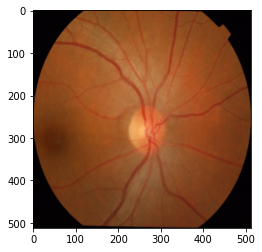

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
sat_channel_train = convert_to_hsv(1, img_train)
len(sat_channel_train)

50

### Test images

In [5]:
sat_channel_test = convert_to_hsv(1, img_test)
len(sat_channel_test)

51

#### Generator of augmented data:

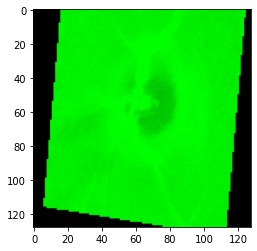

In [6]:
gen = data_generator(sat_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


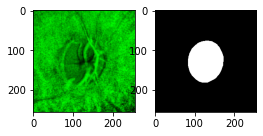

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(sat_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(sat_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_saturation', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 16s 6s/step - loss: 1.4223 - mean_IOU_gpu: 0.0857 - dice_metric: 0.1570 - val_loss: 1.4795 - val_mean_IOU_gpu: 0.0752 - val_dice_metric: 0.1388


### Visual check

image #0


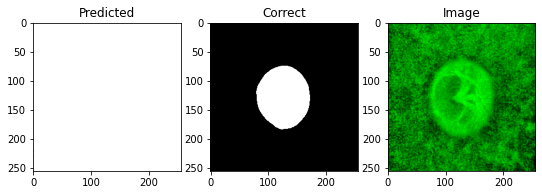

IOU: 0.1191784143447876
Dice: 0.2129748302473344
image #1


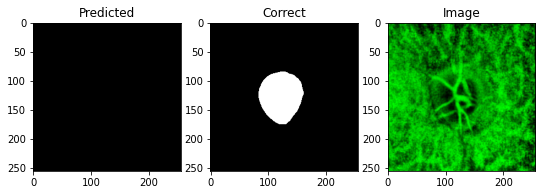

IOU: 0.080169677734375
Dice: 0.14843904506286199
image #2


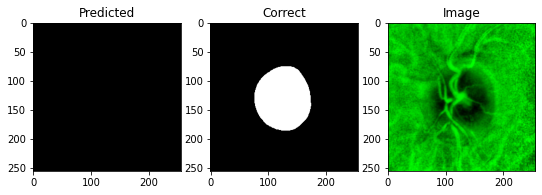

IOU: 0.130340576171875
Dice: 0.23062177704581657
image #3


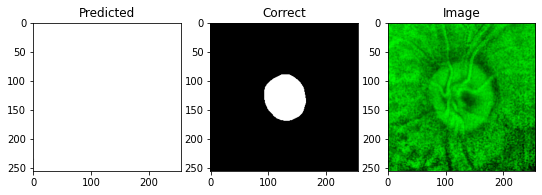

IOU: 0.06880293041467667
Dice: 0.12874764433784477
image #4


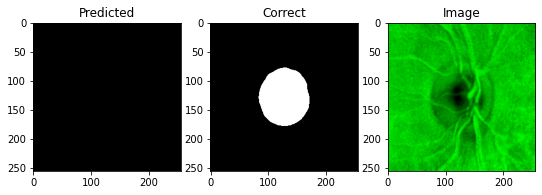

IOU: 0.10498046875
Dice: 0.19001325673884226
image #5


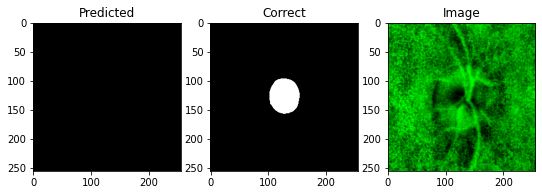

IOU: 0.0387725830078125
Dice: 0.07465076310648236
image #6


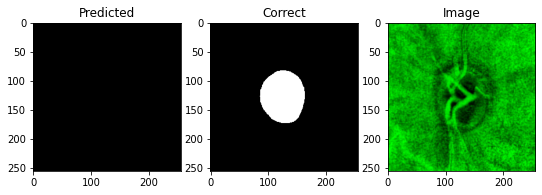

IOU: 0.084381103515625
Dice: 0.15562997776714604
image #7


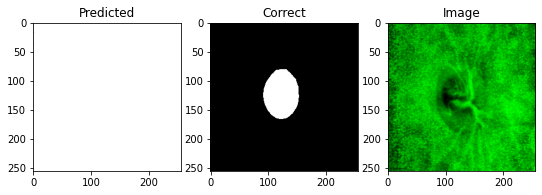

IOU: 0.06262684613466263
Dice: 0.11787175989085948
image #8


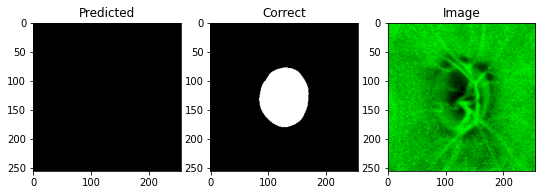

IOU: 0.1042938232421875
Dice: 0.18888781417971287
image #9


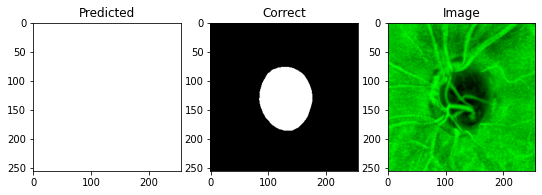

IOU: 0.12016479671001434
Dice: 0.21454842664487128
image #10


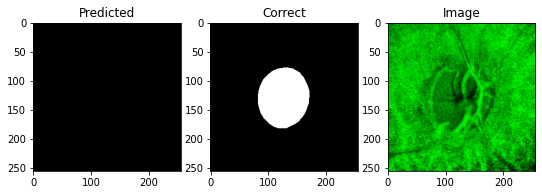

IOU: 0.11175537109375
Dice: 0.2010430963491628
image #11


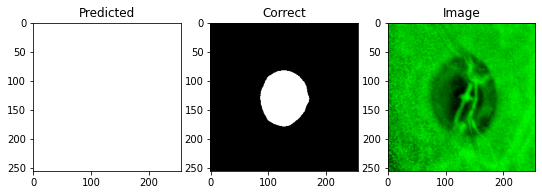

IOU: 0.0946822315454483
Dice: 0.17298578199052134
image #12


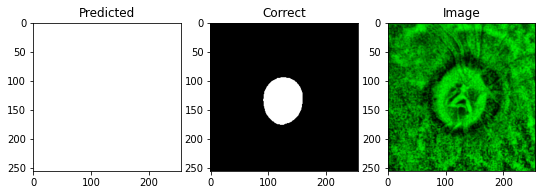

IOU: 0.06698915362358093
Dice: 0.12556669479284355
image #13


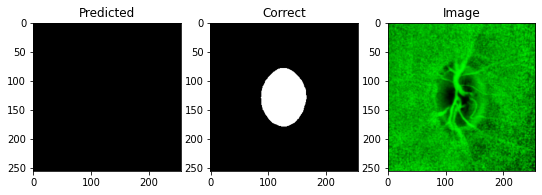

IOU: 0.09234619140625
Dice: 0.1690786165279097
image #14


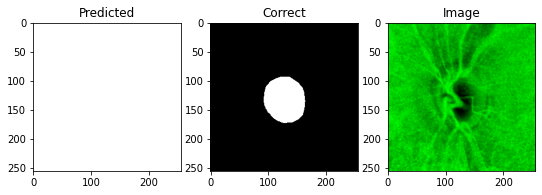

IOU: 0.06950484216213226
Dice: 0.12997574547010987
image #15


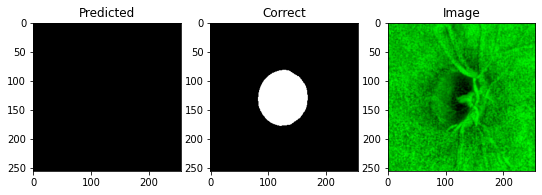

IOU: 0.098052978515625
Dice: 0.17859425808065368
image #16


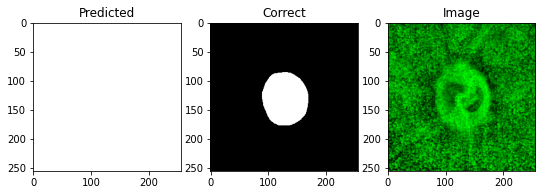

IOU: 0.08978819847106934
Dice: 0.1647810014562563
image #17


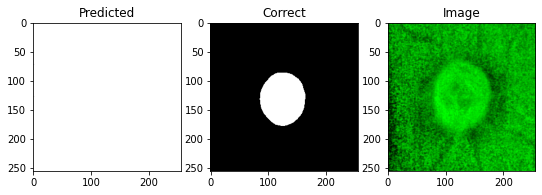

IOU: 0.08607877045869827
Dice: 0.15851294011858263
image #18


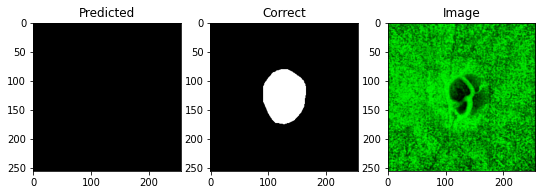

IOU: 0.0840301513671875
Dice: 0.15503286741832412
image #19


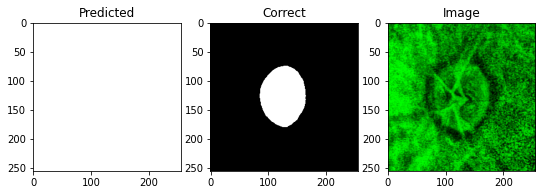

IOU: 0.09773403406143188
Dice: 0.1780650542118432
image #20


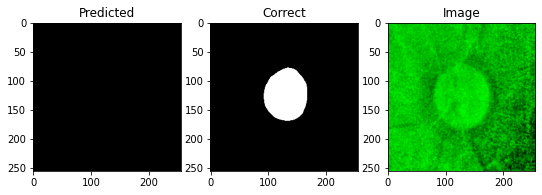

IOU: 0.0821380615234375
Dice: 0.15180699107432422
image #21


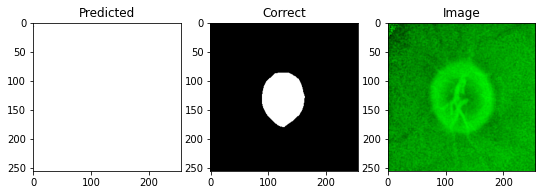

IOU: 0.08001953363418579
Dice: 0.14818163836220294
image #22


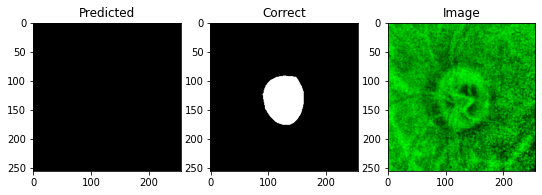

IOU: 0.07293701171875
Dice: 0.13595767677342283
image #23


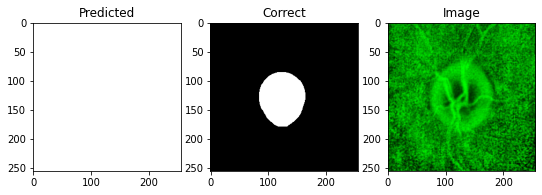

IOU: 0.08894483745098114
Dice: 0.16335967714814192
image #24


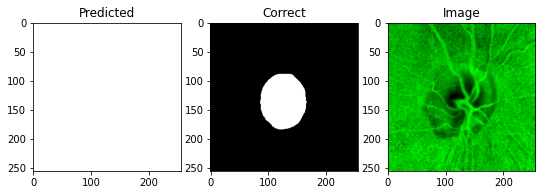

IOU: 0.09219501167535782
Dice: 0.16882518127331406
image #25


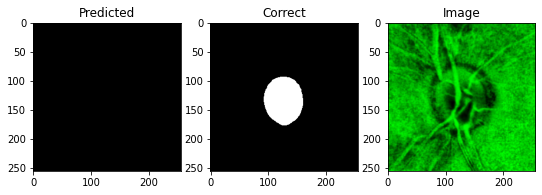

IOU: 0.0675201416015625
Dice: 0.12649904947041923
image #26


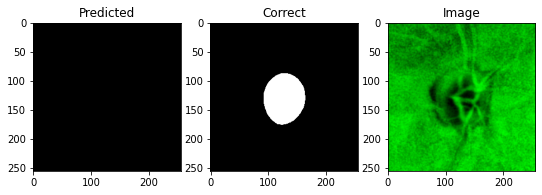

IOU: 0.0757904052734375
Dice: 0.14090180559692494
image #27


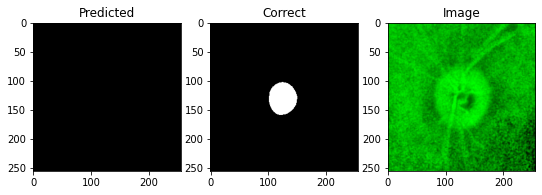

IOU: 0.0327301025390625
Dice: 0.06338558827440494
image #28


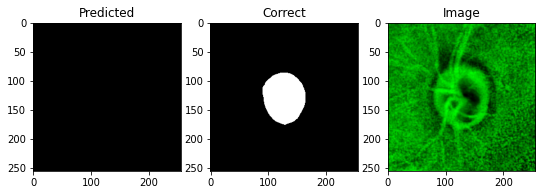

IOU: 0.0778656005859375
Dice: 0.14448109401322215
image #29


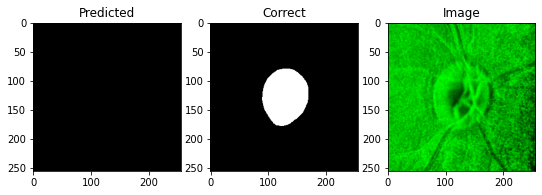

IOU: 0.0930023193359375
Dice: 0.17017771635185883
image #30


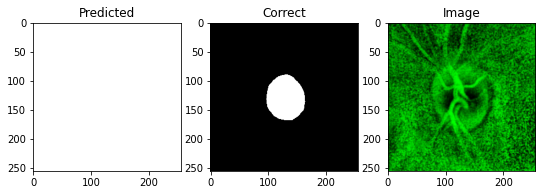

IOU: 0.0626230239868164
Dice: 0.1178649894455693
image #31


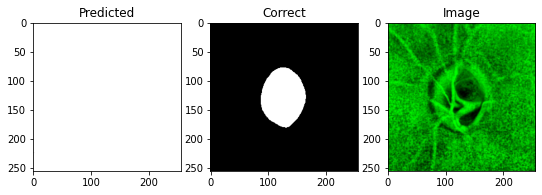

IOU: 0.09184405207633972
Dice: 0.16823657657154037
image #32


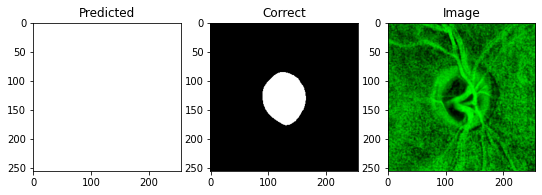

IOU: 0.07841730862855911
Dice: 0.14543036237318355
image #33


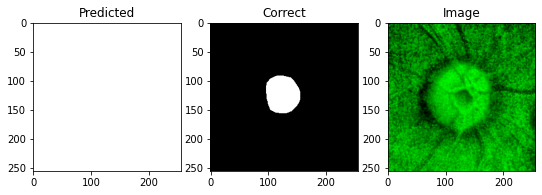

IOU: 0.0477607399225235
Dice: 0.09116726134129469
image #34


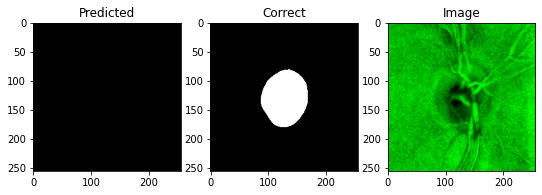

IOU: 0.09393310546875
Dice: 0.17173464263795124
image #35


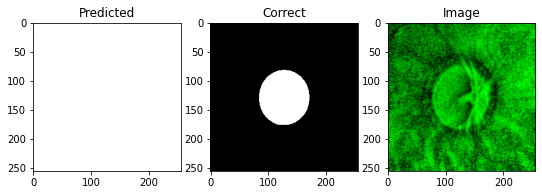

IOU: 0.09976501017808914
Dice: 0.18142968142968144
image #36


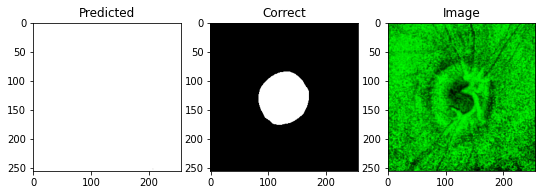

IOU: 0.09393597394227982
Dice: 0.1717394336727577
image #37


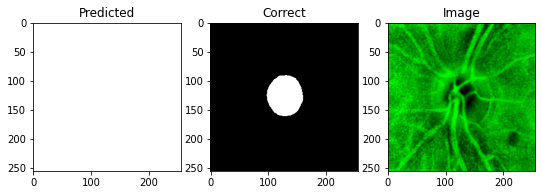

IOU: 0.05262836813926697
Dice: 0.09999420155398353
image #38


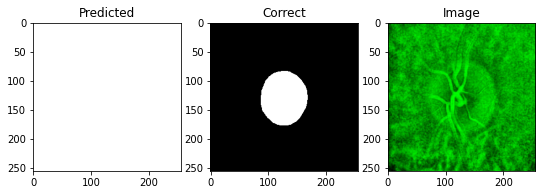

IOU: 0.09146257489919662
Dice: 0.16759635951851695
image #39


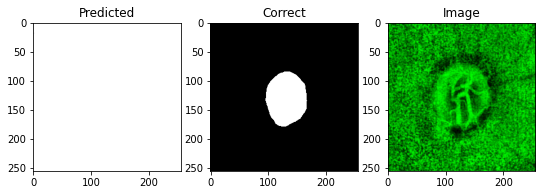

IOU: 0.0796215757727623
Dice: 0.14749904597684904
image #40


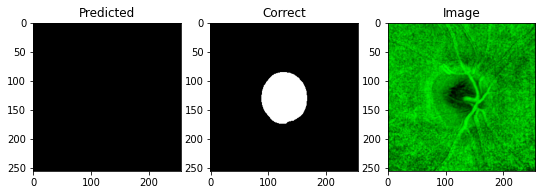

IOU: 0.0839080810546875
Dice: 0.1548250862251003
image #41


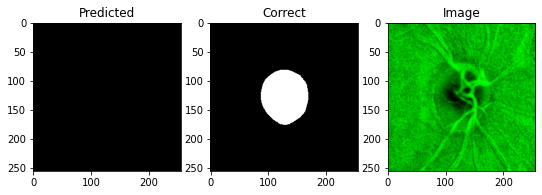

IOU: 0.0921478271484375
Dice: 0.1687460705553615
image #42


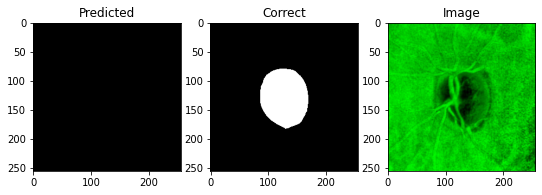

IOU: 0.1030731201171875
Dice: 0.18688356780235438
image #43


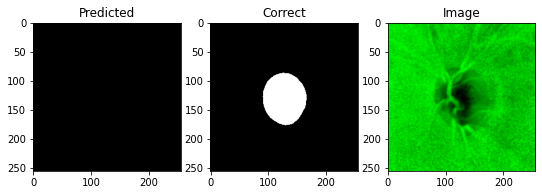

IOU: 0.0802001953125
Dice: 0.1484913549553622
image #44


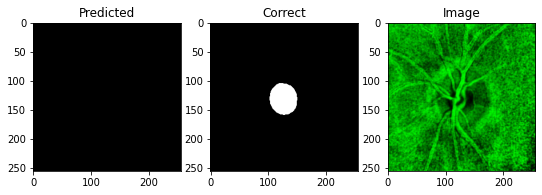

IOU: 0.031494140625
Dice: 0.06106508875739645
image #45


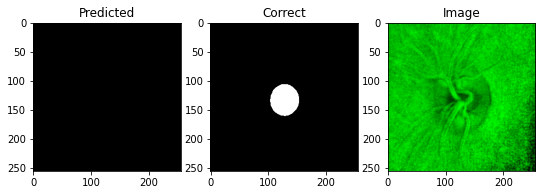

IOU: 0.0325927734375
Dice: 0.06312802931788628
image #46


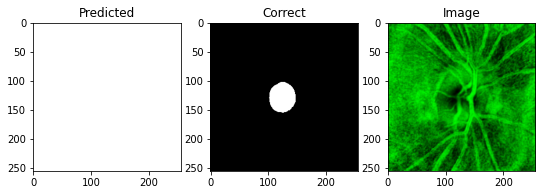

IOU: 0.02882429212331772
Dice: 0.05603345989558614
image #47


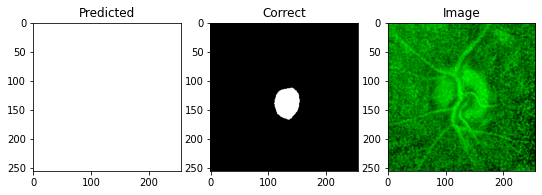

IOU: 0.027786679565906525
Dice: 0.05407090682344557
image #48


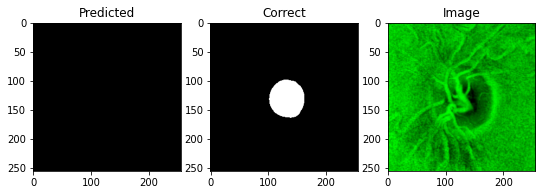

IOU: 0.048187255859375
Dice: 0.09194398346289341
image #49


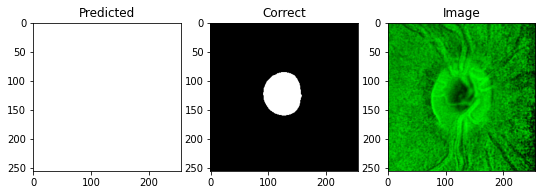

IOU: 0.059464409947395325
Dice: 0.11225371586588316
image #50


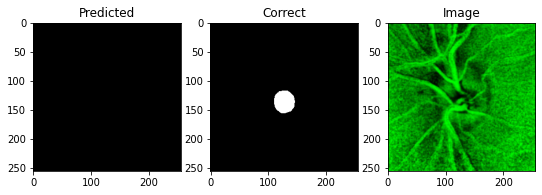

IOU: 0.0171661376953125
Dice: 0.033752868993864475


In [9]:
pred_iou, pred_dice, pred_cup = predict(sat_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.07773829
0.14320557758730737


### Training and Test disc

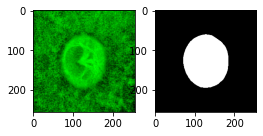

In [11]:
X_test, Z_test = next(data_generator(sat_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
history_disc = train(sat_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_saturation', 
                     model, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 10s 4s/step - loss: 1.0407 - mean_IOU_gpu: 0.1383 - dice_metric: 0.2429 - val_loss: 1.0133 - val_mean_IOU_gpu: 0.1442 - val_dice_metric: 0.2518


image #0


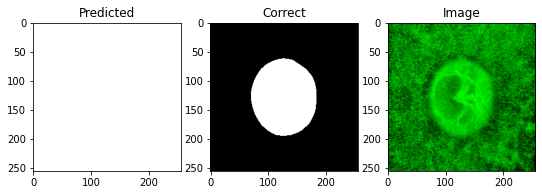

IOU: 0.18155042827129364
Dice: 0.30730881992069947
image #1


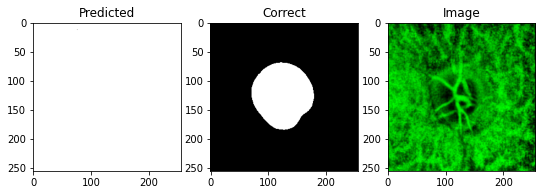

IOU: 0.1418326050043106
Dice: 0.24842977415475076
image #2


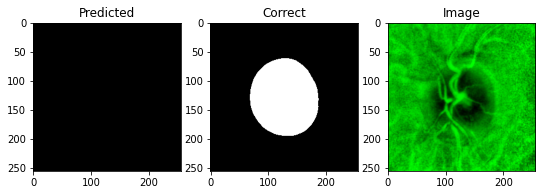

IOU: 0.191619873046875
Dice: 0.32161241580659206
image #3


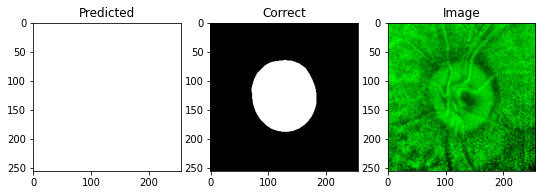

IOU: 0.16781872510910034
Dice: 0.2874054329504919
image #4


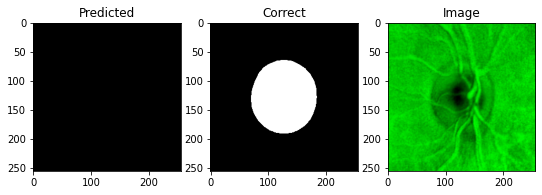

IOU: 0.1737518310546875
Dice: 0.29606229606229606
image #5


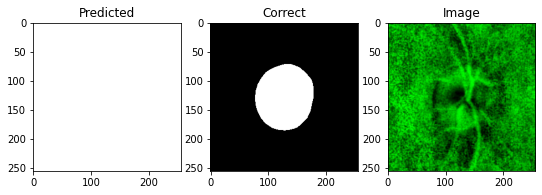

IOU: 0.13934539258480072
Dice: 0.24460605086584436
image #6


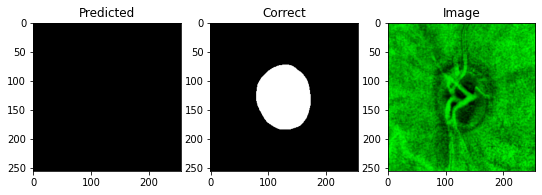

IOU: 0.12725830078125
Dice: 0.22578374573609833
image #7


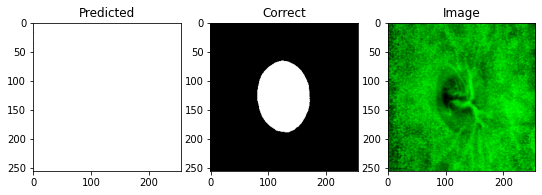

IOU: 0.13351136445999146
Dice: 0.23557129202062493
image #8


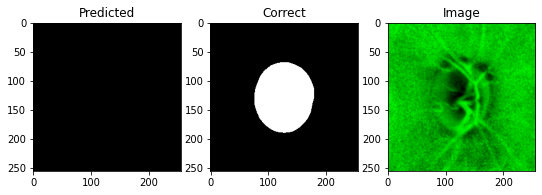

IOU: 0.1508026123046875
Dice: 0.2620824991050001
image #9


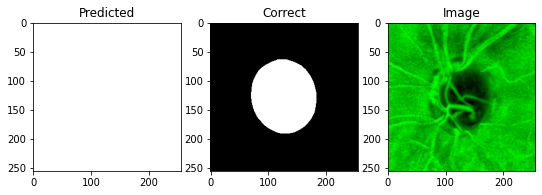

IOU: 0.17405965924263
Dice: 0.2965090587715422
image #10


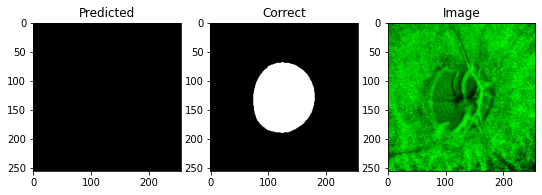

IOU: 0.15643310546875
Dice: 0.270544149469573
image #11


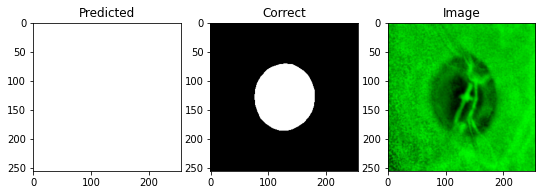

IOU: 0.1446402668952942
Dice: 0.25272615778388036
image #12


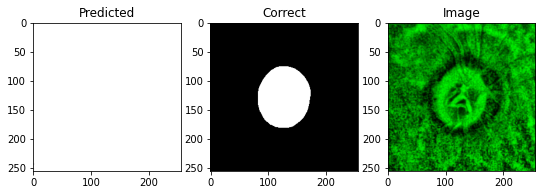

IOU: 0.11693523824214935
Dice: 0.20938588701414032
image #13


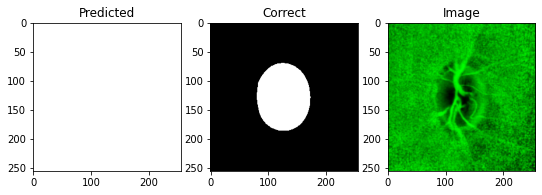

IOU: 0.13196001946926117
Dice: 0.23315314829543157
image #14


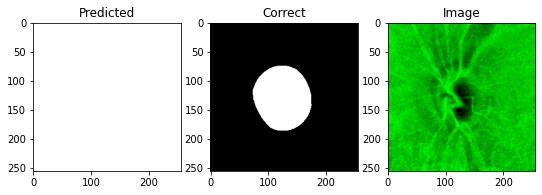

IOU: 0.13459983468055725
Dice: 0.2372639733175534
image #15


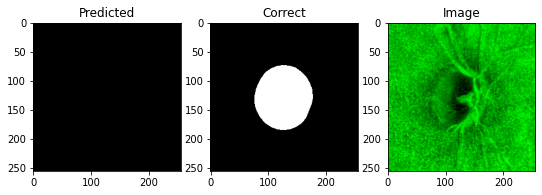

IOU: 0.134124755859375
Dice: 0.23652557651427494
image #16


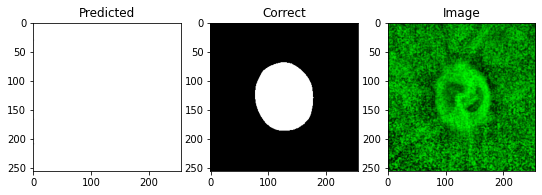

IOU: 0.14422401785850525
Dice: 0.2520905296008322
image #17


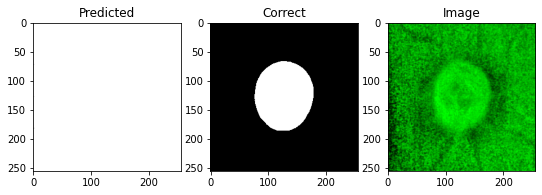

IOU: 0.14690756797790527
Dice: 0.25618031347295034
image #18


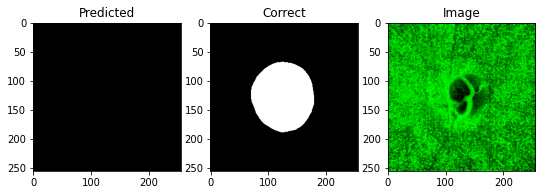

IOU: 0.1568450927734375
Dice: 0.2711600606740091
image #19


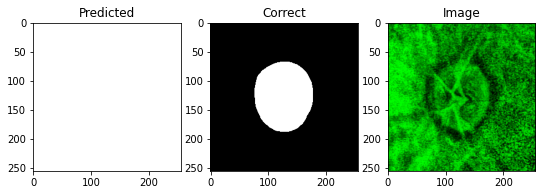

IOU: 0.14941634237766266
Dice: 0.25998645903859174
image #20


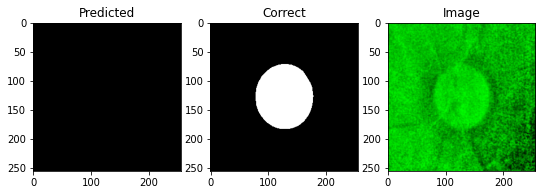

IOU: 0.1345062255859375
Dice: 0.2371185323667469
image #21


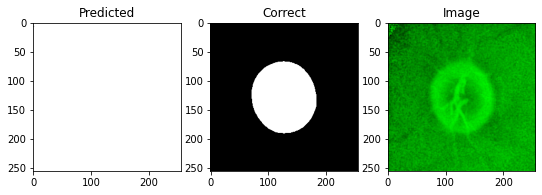

IOU: 0.1669972836971283
Dice: 0.28619995292763933
image #22


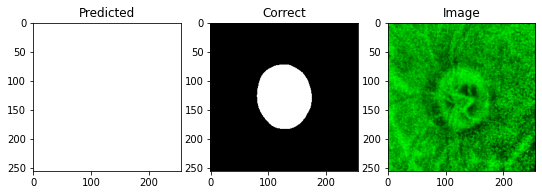

IOU: 0.1271686851978302
Dice: 0.2256426917922268
image #23


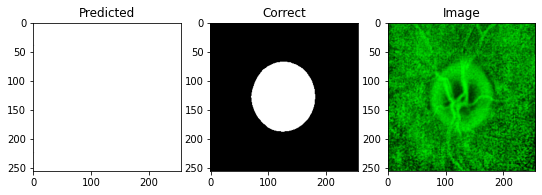

IOU: 0.15829148888587952
Dice: 0.2733189291736931
image #24


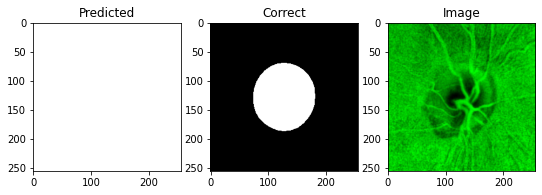

IOU: 0.15144579112529755
Dice: 0.2630532732573549
image #25


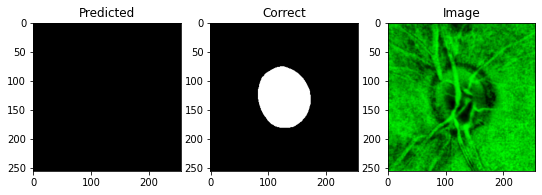

IOU: 0.1148834228515625
Dice: 0.20609046739204817
image #26


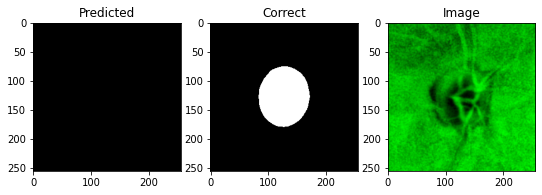

IOU: 0.1101531982421875
Dice: 0.19844684214143357
image #27


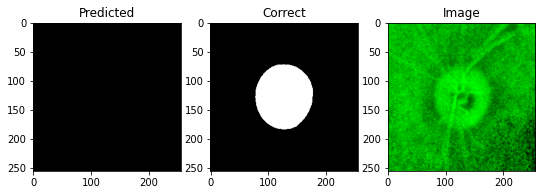

IOU: 0.1339569091796875
Dice: 0.23626454955258022
image #28


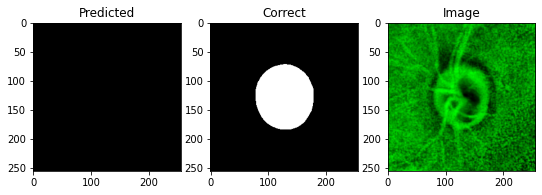

IOU: 0.1374664306640625
Dice: 0.2417063518679992
image #29


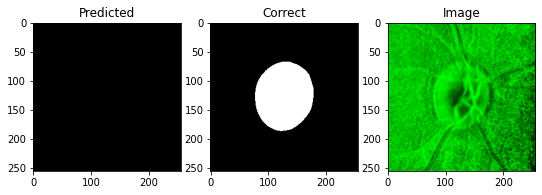

IOU: 0.1446685791015625
Dice: 0.2527693722756175
image #30


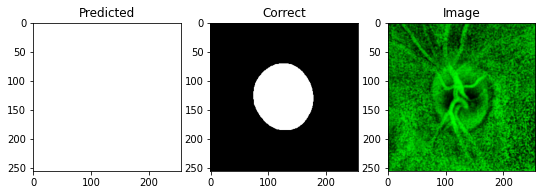

IOU: 0.1430685967206955
Dice: 0.25032371747807397
image #31


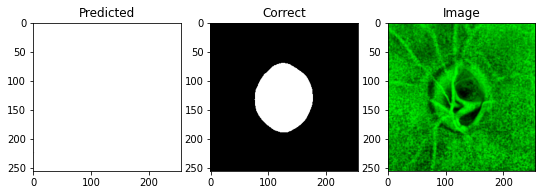

IOU: 0.13888761401176453
Dice: 0.24390047831504483
image #32


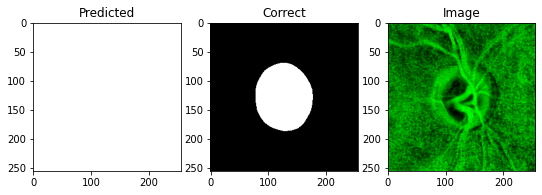

IOU: 0.14046144485473633
Dice: 0.2463238737473073
image #33


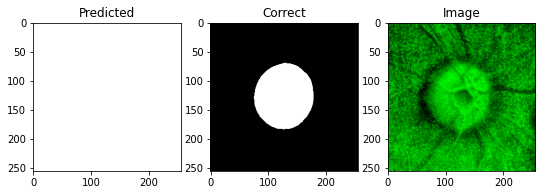

IOU: 0.13973112404346466
Dice: 0.24520016066407818
image #34


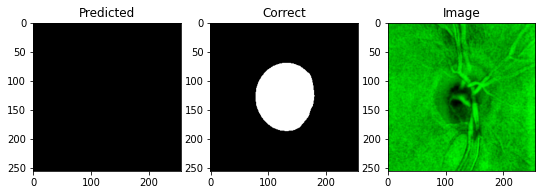

IOU: 0.1438751220703125
Dice: 0.2515573934502768
image #35


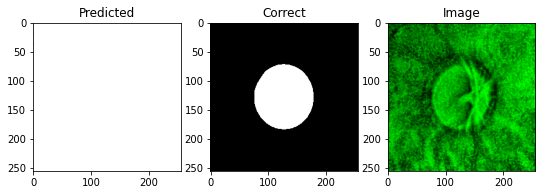

IOU: 0.1378847360610962
Dice: 0.2423527202993201
image #36


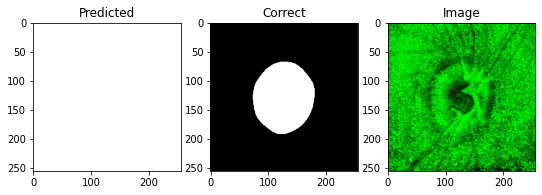

IOU: 0.15717272460460663
Dice: 0.27164954571228883
image #37


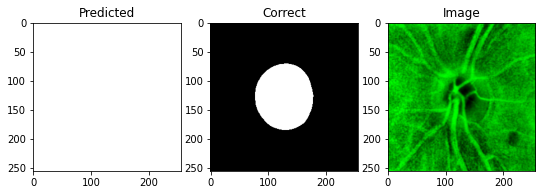

IOU: 0.13899442553520203
Dice: 0.24406516263865816
image #38


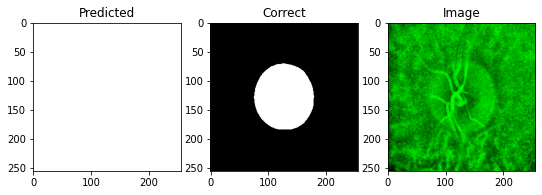

IOU: 0.1424756646156311
Dice: 0.24941566160462664
image #39


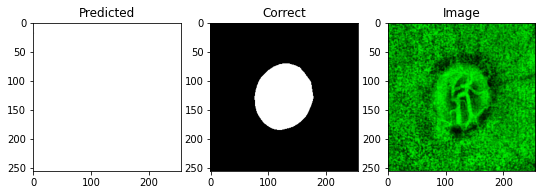

IOU: 0.13690394163131714
Dice: 0.24083643147623712
image #40


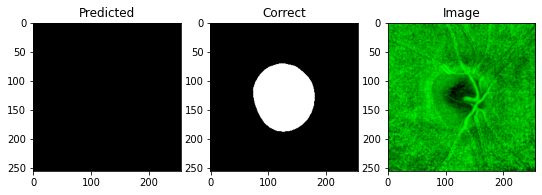

IOU: 0.1484832763671875
Dice: 0.25857281411508365
image #41


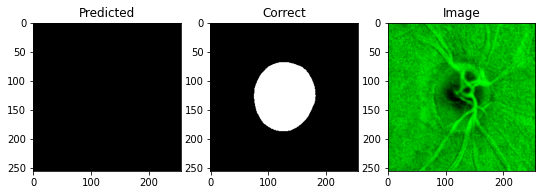

IOU: 0.1515960693359375
Dice: 0.2632799353394019
image #42


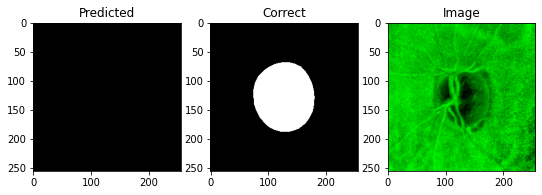

IOU: 0.153839111328125
Dice: 0.2666560871750112
image #43


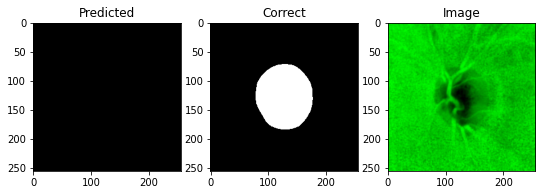

IOU: 0.134490966796875
Dice: 0.2370948217888366
image #44


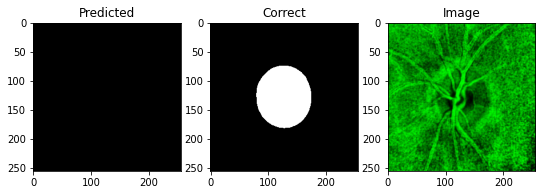

IOU: 0.1239471435546875
Dice: 0.22055689053611915
image #45


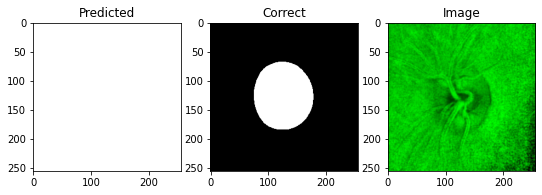

IOU: 0.14659342169761658
Dice: 0.25570253653083497
image #46


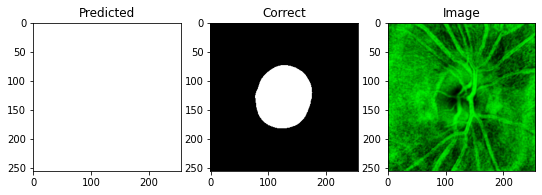

IOU: 0.1281605213880539
Dice: 0.22720264019260422
image #47


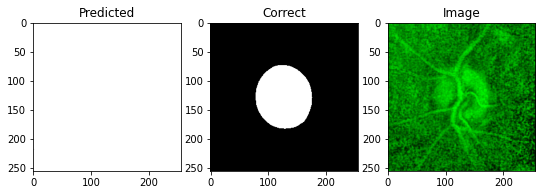

IOU: 0.12894070148468018
Dice: 0.22842776816608998
image #48


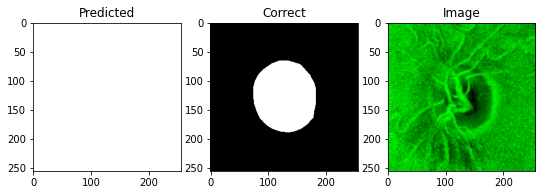

IOU: 0.16418707370758057
Dice: 0.28206304476046923
image #49


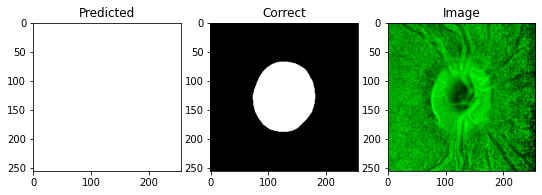

IOU: 0.15663385391235352
Dice: 0.27084432717678103
image #50


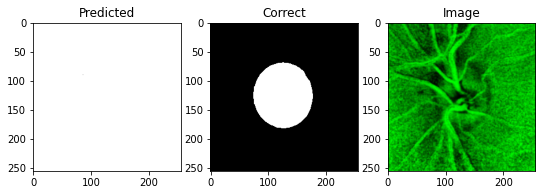

IOU: 0.13897916674613953
Dice: 0.24404163819782163


In [13]:
pred_iou, pred_dice, pred_disc = predict(sat_channel_test, X_test, Z_test, model, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.14455846
0.2522562010330878


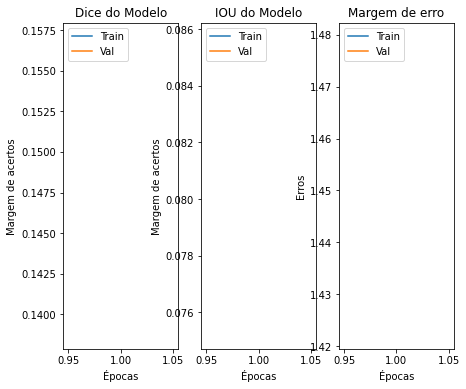

In [15]:
plot_results(history_cup, epochs)

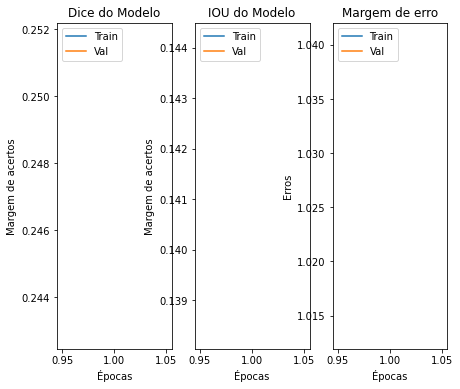

In [16]:
plot_results(history_disc, epochs)

In [17]:
create_table_result(pred_cup, pred_disc, test_idx)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'
